# TSF DSBA: TASK 01 PREDICTION USING SUPERVISED ML

## BY NIKITA GUPTA

### SIMPLE LINEAR REGRESSION
In this task 1, we've to predict the percentage of the student based on the no. of study hours. This is a simple linear regression model as it involves only two variables. Also, in this, we'll use Python Scikit-Learn library to implement regression function.

In [1]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing data using the link given in the TSF task pdf
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data has been imported")
data.head()

Data has been imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#Summary
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


We'll now find out if there is any relationship between the data by plotting the data points on a 2D graph

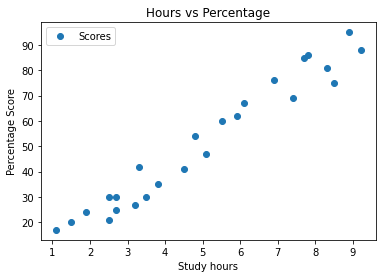

In [4]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Study hours')
plt.ylabel('Percentage Score')
plt.show()

Clearly, there is a positive linear relation between the data.

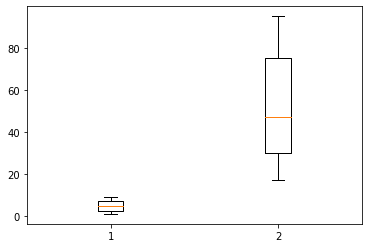

In [5]:
# For outlier detection
plt.boxplot(data)
plt.show()

There is no outliers in Study Hours(subplot1) and Percentage Score(subplot2)

### Data Preparation

We'll now divide the data into inputs and outputs i.e, attributes and labels.

In [6]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

Now, the data is to be split into training and test sets.

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(20, 1) (5, 1) (20,) (5,)


### Training the Algorithm

We'll now train our algorithm

In [8]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)
print(" Training of Algorithm is complete ")

 Training of Algorithm is complete 


In [9]:
# Coefficient and Intercept
slope = lm.coef_
print("Slope of the regression line is:", slope) 
intercept = lm.intercept_
print("Intercept of the regression line is:", intercept)

Slope of the regression line is: [9.91065648]
Intercept of the regression line is: 2.018160041434662


In [10]:
# Fitted Regression Line
print("Regression Line: Score=", lm.intercept_, "+", lm.coef_[0], "Hours")

Regression Line: Score= 2.018160041434662 + 9.91065648064224 Hours


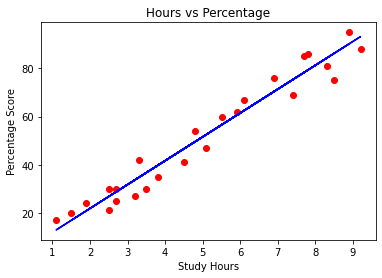

In [11]:
#Plotting of regression line
line = lm.coef_*x+lm.intercept_
# Plotting the test data
plt.scatter(x,y, color = 'red')
plt.title('Hours vs Percentage')
plt.xlabel('Study Hours')
plt.ylabel('Percentage Score')
plt.plot(x,line, color = 'blue')
plt.show()

### Predictions

In [20]:
#Predicted Value of trained data sets
train_pred = lm.predict(x_train)
print("predicted value of trained data set")
train_pred

predicted value of trained data set


array([39.67865467, 20.84840735, 79.32128059, 70.40168976, 12.91988217,
       52.56250809, 78.33021494, 34.72332643, 84.27660883, 93.19619966,
       62.47316457, 36.70545772, 28.77693254, 56.52677068, 28.77693254,
       86.25874013, 26.79480124, 49.58931115, 90.22300272, 46.6161142 ])

In [21]:
#Predicting value of test data set
test_pred = lm.predict(x_test)
print("predicted value of test data set")
test_pred

predicted value of test data set


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [22]:
#Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': test_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Text(0.5, 1.0, 'Actual vs Predicted')

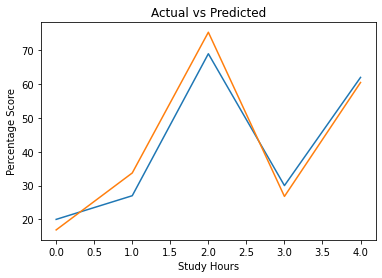

In [23]:
plt.plot(df)
plt.xlabel('Study Hours')
plt.ylabel('Percentage Score')
plt.title('Actual vs Predicted')

#### Predicted score if a student studies for 9.25hrs/day

In [24]:
predicted_value = lm.predict([[9.25]])
print(' Prediction Score if a student studies for 9.25hrs/day is:')
predicted_value[0]

 Prediction Score if a student studies for 9.25hrs/day is:


93.69173248737539

### Model Evaluation

We'll finally evaluate the performance of the algorithm used. To evaluate, we'll use R-squared value, Mean Absolute error and Mean squared error value as the accuracy measures.

In [25]:
#Evaluating the model
print('R-squared value for the given model is:')
lm.score(x_train, y_train)

R-squared value for the given model is:


0.9515510725211552

R-squared, also known as coefficient of determination, measures how close the data are to the fitted regression line or how much variability of the response variable is explained by the predictor variable. Here, R-squared value is 0.9515.. So, Predictor variable is able to explain 95.15% variance in the response variable.

In [30]:
from sklearn.metrics import mean_absolute_error
print ('Mean Absolute error for the given model is:',mean_absolute_error(y_test, test_pred))

Mean Absolute error for the given model is: 4.183859899002982


Mean Absolute Error (MAE), measures the absolute average distance between the real data and the predicted data

In [31]:
from sklearn.metrics import mean_squared_error
print ('Mean Squared error for the given model is:',mean_squared_error(y_test, test_pred))

Mean Squared error for the given model is: 21.598769307217456


Mean Square Error (MSE), measures the squared average distance between the real data and the predicted data.

By observing the accuracy measure values , we can conclude that the chosen regression model is a good fit for the given data set.

### Thus, with this, our task1 of PREDICTION USING SUPERVISED ML is completed.
### Thank You!